In [26]:
import json
import networkx as nx

In [27]:
SHAKESPEARE = None
with open('play_details.json') as f:
    SHAKESPEARE = json.load(f)
    
assert SHAKESPEARE, "Failed to load JSON. Check path to file exists."

In [28]:
all_plays = []
for entry in SHAKESPEARE.keys():
    all_plays.append(nx.read_gpickle(f'output/{entry}.gpickle'))

assert len(all_plays) == 12, "Failed to load pickles. Check paths to files exist."

In [29]:
from collections import Counter

In [42]:
these_measures = {
        'degree': nx.degree_centrality,               #fraction of nodes a given node is connected to (# of unique exchanges the character has)
        'betweenness': nx.betweenness_centrality,     #sum of the fraction of shortest paths passing through a given node (how much of a "broker" the character is)
        'closeness': nx.closeness_centrality,         #reciprocal of the average shortest path distance from a given node to all other nodes (nearness to all other characters)
        'cluster_coeff': nx.clustering,               #fraction of actual triangles through a given node over all possible triangles (how much of a "broker" the character is between any two characters)
        'eigen_centrality': nx.eigenvector_centrality #centrality of a given node based on the centrality of its neighbors (importance of a character based on importance of the characters it speaks with)
    }
for this_play in all_plays:
    print(this_play.name.title())
    counter_top_5 = Counter()
    for this_name, this_funct in these_measures.items():
        these_vals = this_funct(this_play)
        nx.set_node_attributes(this_play, these_vals, name=this_name)
        top_5 = [k for k,v in sorted(these_vals.items(), key=lambda item: item[1], reverse=True)][:5]
        print(this_name.title(), top_5)
        counter_top_5.update(top_5)
#     print("\t",this_play.name.title(), counter_top_5.most_common(5),'\n')
    print('\n')

Romeo
Degree ['Capulet', 'Romeo', 'Benvolio', 'Prince', 'Friar Lawrence']
Betweenness ['Benvolio', 'Romeo', 'Capulet', 'Nurse', 'First Watch']
Closeness ['Capulet', 'Benvolio', 'Romeo', 'Nurse', 'Friar Lawrence']
Cluster_Coeff ['Gregory', 'Abram', 'Lady Montague', 'Second Servant', 'Friar John']
Eigen_Centrality ['Capulet', 'Romeo', 'Benvolio', 'Friar Lawrence', 'Juliet']


Othello
Degree ['Cassio', 'Othello', 'Iago', 'Duke', 'Desdemona']
Betweenness ['Othello', 'Cassio', 'Duke', 'Montano', 'Desdemona']
Closeness ['Othello', 'Cassio', 'Iago', 'Desdemona', 'Duke']
Cluster_Coeff ['Sailor', 'Second Gentleman', 'Third Gentleman', 'Herald', 'Gentlemen']
Eigen_Centrality ['Cassio', 'Othello', 'Iago', 'Desdemona', 'Emilia']


Hamlet
Degree ['Hamlet', 'King', 'Horatio', 'Laertes', 'Queen']
Betweenness ['Hamlet', 'King', 'Horatio', 'Laertes', 'Polonius']
Closeness ['Hamlet', 'King', 'Horatio', 'Queen', 'Marcellus']
Cluster_Coeff ['Barnardo', 'Francisco', 'Guildenstern', 'First Player', 'Prologu

In [72]:
import pandas as pd
import seaborn as sns

In [66]:
# let's see how correlated the various measures are
df = pd.DataFrame(columns=['presence','degree','betweenness','closeness','cluster_coeff','eigen_centrality'])

for this_play in all_plays:
    temp_df = pd.DataFrame.from_dict(this_play.nodes(data=True))
    temp_df = temp_df[1].apply(pd.Series)
    
    df = df.append(temp_df) 

df.drop(columns='presence', inplace=True)

In [90]:
cmap = sns.color_palette("Spectral", as_cmap=True)

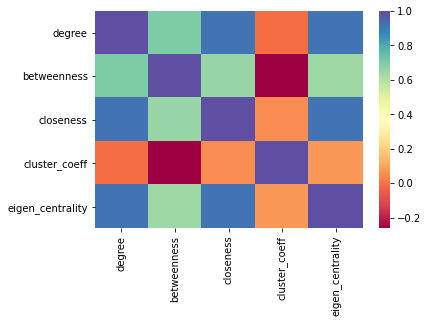

In [91]:
pearson = df.corr('pearson')
sns.heatmap(pearson, annot=False, cmap=cmap);

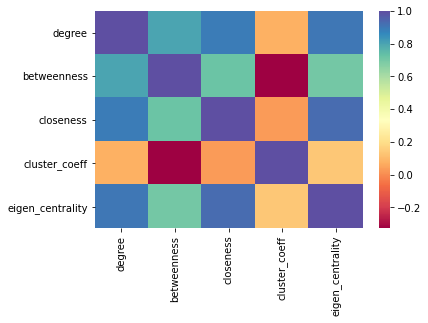

In [92]:
spearman = df.corr('spearman')
sns.heatmap(spearman, annot=False, cmap=cmap);

# Romeo & Juliet - titular character not included
# Macbeth - Lady Macbeth not included, she convinced Macbeth to commit regicide

# End